C:\Users\Lxj\AppData\Local\Temp\ipykernel_5344\2527394726.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)
C:\Users\Lxj\AppData\Local\Temp\ipykernel_5344\2527394726.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)
C:\Users\Lxj\AppData\Local\Temp\ipykernel_5344\2527394726.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)
C:\Users\L

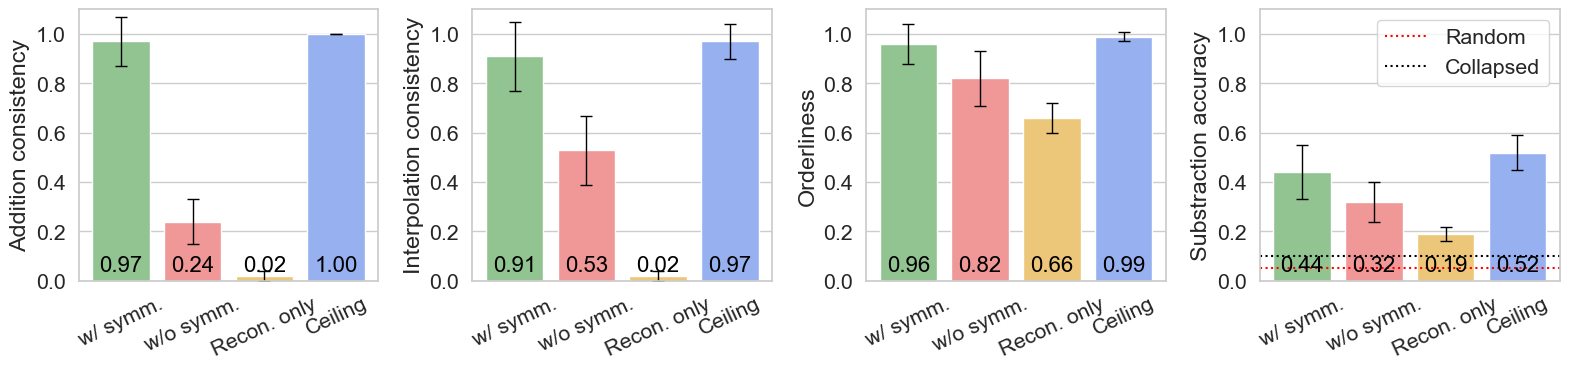

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



# ===== 数据（均值与标准差）=====
exps = ["w/ symm.", "w/o symm.", "Recon. only", "Ceiling"]
metrics = ["Addition consistency", "Interpolation consistency", "Orderliness", "Substraction accuracy"]

means = {
    "Addition consistency":        [0.97, 0.24, 0.02, 1.00],
    "Interpolation consistency":   [0.91, 0.53, 0.02, 0.97],
    "Orderliness":                 [0.96, 0.82, 0.66, 0.99],
    "Substraction accuracy":       [0.44, 0.32, 0.19, 0.52],
}
stds = {
    "Addition consistency":        [0.10, 0.09, 0.02, 0.00],
    "Interpolation consistency":   [0.14, 0.14, 0.02, 0.07],
    "Orderliness":                 [0.08, 0.11, 0.06, 0.02],
    "Substraction accuracy":       [0.11, 0.08, 0.03, 0.07],
}

# 转成长表（含 mean 和 std）
rows = []
for m in metrics:
    for e, mu, sd in zip(exps, means[m], stds[m]):
        rows.append({"metric": m, "exp": e, "mean": mu, "std": sd})
df = pd.DataFrame(rows)

# ===== 颜色（浅色系）=====
palette = {
    "w/ symm.":           "#88cc88",  # 绿
    "w/o symm.":                "#ff8888",  # 红
    "Recon. only":                      "#ffcc66",  # 橙黄
    "Ceiling":   "#88aaff",  # 蓝
}

# ===== 画图 =====
sns.set(style="whitegrid", font_scale=1.4)
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

for ax, m in zip(axes, metrics):
    sub = df[df["metric"] == m]
    # 用 seaborn 按实验上色（不使用 hue，避免重复分组）
    sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)

    # 在柱子顶部加标准差；在柱子底部标注“均值数字”
    ymin_label = 0.02  # 底部文字的固定高度（可视需要调小/大）
    for (patch, sd, mu) in zip(ax.patches, sub["std"].values, sub["mean"].values):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()

        # 顶部误差条（标准差）
        ax.errorbar(x, y, yerr=sd, fmt="none", ecolor="black", capsize=4, lw=1)

        # 底部数值（显示均值，不显示标准差）
        ax.text(x, ymin_label, f"{mu:.2f}", ha="center", va="bottom", fontsize=16, color="black")
    if m == "Substraction accuracy":
        ax.axhline(0.05, color='red', linestyle=':', label='Random')
        ax.axhline(0.10, color='black', linestyle=':', label='Collapsed')
        ax.legend()

    # ax.set_title(m)
    ax.set_xlabel("")
    # ax.set_ylabel("Score")
    ax.set_ylabel(m)
    ax.set_ylim(0, 1.1)
    ax.tick_params(axis="x", rotation=25)

# 统一布局
plt.tight_layout()
plt.show()
